## Modèle linéaire

Modéliser une variable $Y$ (variable à expliquer, réponse) en fonction d'une ou plusieurs variables explicatives $X_1,...,X_p$ (covariables).

On cherche une fonction $f$ telle que 
$$Y \approx f(X_1,...,X_p)$$ 

Dans ce cours, on supposera que $Y$ est une variable quantitative et que $f$ est une fonction affine. 

La fonction $f$ qui minimise le coût quadratique $f \mapsto \mathbb E \big(Y - f(X_1,...,X_p) \big)^2$ est l'espérance conditionnelle 

$$ f(X_1,...,X_p) = \mathbb E(Y \vert X_1,...,X_p).  $$

Dans le cas Gaussien, l'espérance conditionnelle est une fonction affine:

$$ f(X_1,...,X_p) = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p,    $$

qui est la forme étudiée dans le cadre de la régression linéaire.

#### Application aux données du Cancer de la prostate (Stamey et al. 1989)

On étudie les liens entre le niveau d'un antigène (PSA) et des mesures cliniques chez 97 patients. On cherchera à expliquer le logarithme du taux d'antigène PSA (variable __lpsa__) à partir des différentes variables explicatives du jeu de données.

In [11]:
# pip install numpy == 1.19.3
# pip install sklearn
# pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
prostate = pd.read_csv("ProstateCancerData.csv", sep = ";", header = 0)

#### Visualisation des données 

In [2]:
prostate.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


La représentation graphique des données individuellement et deux-à-deux peut apporter des informations sur le types des variables, leurs valeurs possibles, leurs liens directs, la présence de données manquantes ou aberrantes etc...

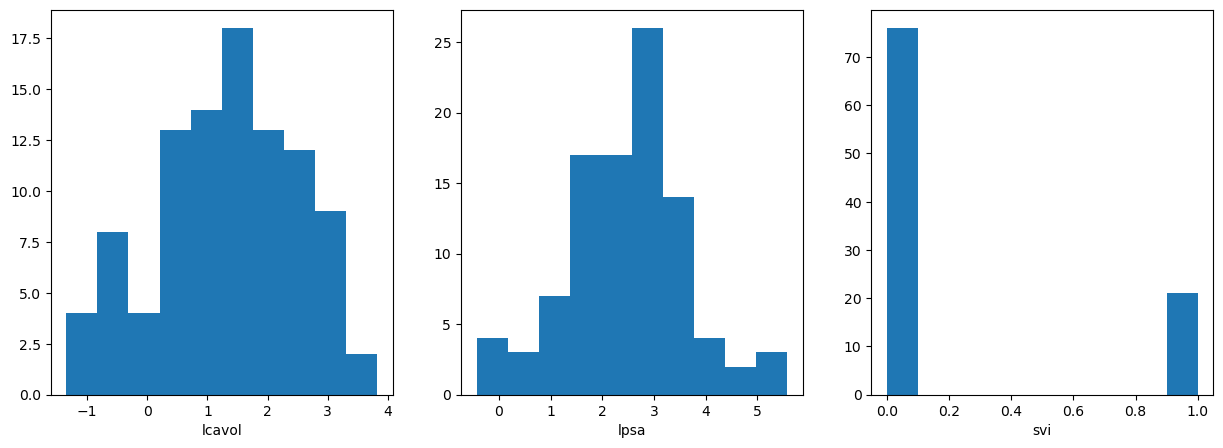

In [3]:
fig = plt.figure(1, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(prostate["lcavol"])
plt.xlabel("lcavol")

plt.subplot(1, 3, 2)
plt.hist(prostate["lpsa"])
plt.xlabel("lpsa")

plt.subplot(1, 3, 3)
plt.hist(prostate["svi"])
plt.xlabel("svi")

plt.show()

__Corrélation linéaire__

Soit deux variables $x,y \in \mathbb R^n$, on note:

- $\overline x = \frac 1 n \sum_{i=1}^n x_i$ la moyenne empirique de $x$ (resp. $y$)

- $\sigma_x^2 = \frac 1 n \sum_{i=1}^n (x_i - \overline x)^2 $ la variance empirique de $x$ (resp. $y$)

- $\sigma_{xy} = \frac 1 n \sum_{i=1}^n x_i y_i - \overline x \ \overline y$ la covariance empirique entre $x$ et $y$. 

Le __coefficient de corrélation linéaire__ ou __coefficient de corrélation de Pearson__ est défini par

$$ \rho_{xy} = \frac{\sigma_{xy}}{\sigma_x \sigma_y} \in [-1; 1].    $$ 

$\rho_{xy} $ est proche de $1$ (resp. $-1$) s'il existe un lien affine croissant (resp. décroissant) fort entre $x$ et $y$.

_Question 1. Calculer la corrélation linéaire entre les variables __lcavol__ et __lpsa__ puis entre les variables __lweight__ et __lcavol__ en utilisant la fonction __pearsonr__ de la librairie __scipy.stats__. Représenter les nuages de points correspondants._

rho_lcavol_lpsa (0.7344603262136731, 1.1186085585019795e-17)
rho_lcavol_lweight (0.2805213800098329, 0.0053840095419008475)


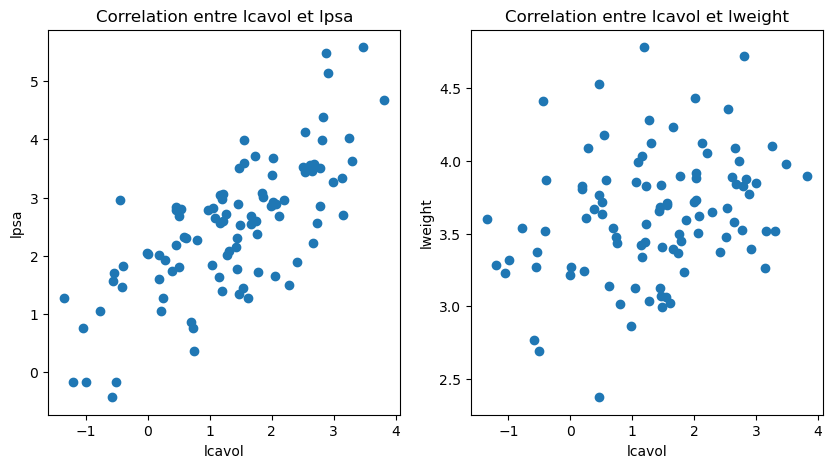

In [13]:
from scipy.stats import pearsonr

pearsonr_lcavol_lpsa = pearsonr(prostate["lcavol"], prostate["lpsa"])
pearsonr_lcavol_lweight = pearsonr(prostate["lcavol"], prostate["lweight"])
print("rho_lcavol_lpsa", pearsonr_cavol_lpsa)
print("rho_lcavol_lweight", pearsonr_lcavol_lweight)

fig, axis = plt.subplots(1, 2, figsize=(10,5))

axis[0].scatter(prostate["lcavol"], prostate["lpsa"])
axis[0].set_xlabel("lcavol")
axis[0].set_ylabel("lpsa")
axis[0].set_title("Correlation entre lcavol et lpsa")

axis[1].scatter(prostate["lcavol"], prostate["lweight"])
axis[1].set_xlabel("lcavol")
axis[1].set_ylabel("lweight")
axis[1].set_title("Correlation entre lcavol et lweight")
fig.show()

La représentation graphique entre une variables qualitative et une variable quantitative peut se faire pas des boîtes à moustaches.

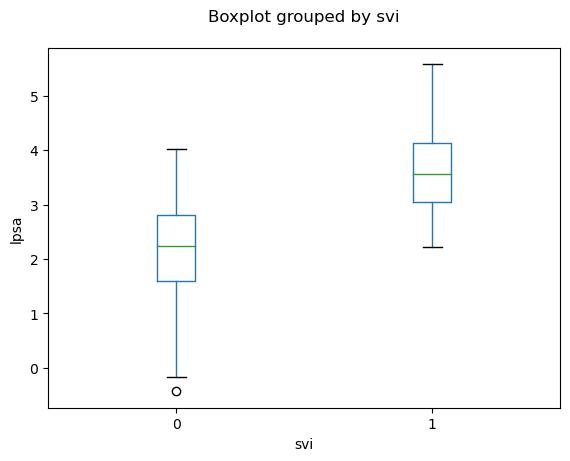

In [14]:
prostate.boxplot(by = 'svi', column = ['lpsa'], grid = False)
plt.ylabel("lpsa")
plt.title("")
plt.show()

### Régression linéaire simple

On n'utilise qu'une seule variable explicative $X$ ($p=1$). 

On observe un échantillon $\{ y_i,x_i \}_{i=1,...,n}$ dont on suppose qu'il vérifie une relation de la forme

$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \ \ i=1,...,n.   $$

Le modèle s'écrit sous la forme matricielle

$$ y = X \beta + \epsilon    $$

avec

$$y = \left( \begin{array}{c} y_1 \\ \vdots \\ y_n   \end{array} \right) \ , \  X = \left( \begin{array}{cc} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n   \end{array} \right) \ , \ \beta= \left( \begin{array}{c} \beta_0 \\ \beta_1   \end{array} \right) \ \text{ et } \ \epsilon =  \left( \begin{array}{c} \epsilon_1 \\ \vdots \\ \epsilon_n   \end{array} \right). $$

Le cadre théorique classique du modèle sont les suivantes:
- Les $x_i$ sont traités comme __déterministes__ (non aléatoires), l'alea est uniquement dû à la présence des bruits $\epsilon_i$. 
- $y$ et $\epsilon$ sont des réalisations de variables aléatoires.
- $X$ et $\beta$ sont déterministes.

Par ailleurs:
- $y$ et $X$ sont connus / observés.
- $\epsilon$ et $\beta$ sont inconnus.

On suppose que les bruits $\epsilon_i$ sont
- centrés: $\mathbb E (\epsilon_i) = 0$,
- non-corrélés: $\forall i \neq j, \operatorname{cov}(\epsilon_i, \epsilon_j) = 0$,
- de variances égales (homoscédastiques): $\operatorname{var}(\epsilon_i) = \sigma^2 < \infty$.

Sous forme matricielle:

$$\mathbb E(\epsilon) = 0 \ \ \text{ et } \ \ \operatorname{var} ( \epsilon) = \sigma^2 I.$$ 

Parfois, on suppose en plus que les $\epsilon_i$ sont Gaussiens.

__Méthode des moindres carrés__

L'estimateur des __moindres carrés ordinaires (MCO)__ $\hat \beta = (\hat \beta_0, \hat \beta_1)^\top$ minimise

$$ b \mapsto \Vert y - X b \Vert^2  = \sum_{i=1}^n (y_i - b_0 - b_1 x_i )^2, \ \ b=(b_0,b_1)^\top \in \mathbb R^2.   $$

Il a pour une forme explicite

$$ \hat \beta_1 =  \frac{\sigma_{xy}}{\sigma_x^2} \ \ \ \text{ et } \ \ \ \hat \beta_0 = \bar y - \hat \beta_1 \bar x.  $$

La droite $x \mapsto \hat \beta_0 + \hat \beta_1 x$ est appelée la __droite de régression__.

_Application:_ Régression linéaire de __lpsa__ en fonction de __lweight__.

In [53]:
y = prostate["lpsa"].values
x = prostate["lweight"].values

_Question 2: Calculer l'estimateur $\hat \beta$ des moindres carrés et représenter le nuage de points avec la droite de régression._

beta_one_hat = 1.167553803719508
beta_zeros_hat = -1.7585989275717409


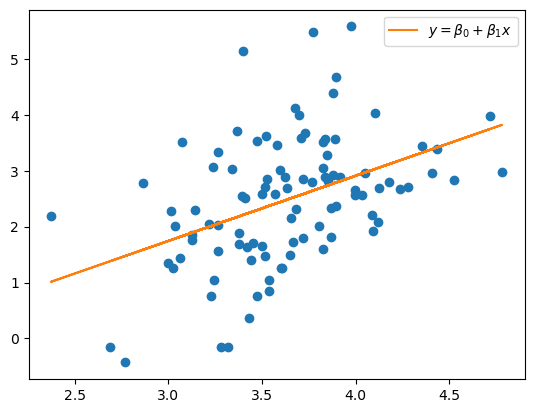

In [54]:
gamma_xy = np.cov(x, y)
sigma_xy = gamma_xy[0, 1]
var_x    = gamma_xy[0, 0]

beta_one_hat = sigma_xy/var_x
beta_zeros_hat = y.mean() - beta_one_hat*x.mean()
print("beta_one_hat =", beta_one_hat)
print("beta_zeros_hat =", beta_zeros_hat)

# Model
ypred = beta_zeros_hat + beta_one_hat * x

plt.scatter(x, y)


plt.plot(x,  ypred, color = 'tab:orange', label=r'$y=\beta_{0} + \beta_{1} x$')
plt.legend()
plt.show()

### Régression linéaire multiple

Généralisation à plusieurs variables explicatives $X_1,...,X_p$, on observe des réalisations indépendantes $\{ y_i, x_{1i},...,x_{pi} \}_{i=1,...,n}$, avec

$$ y_i = \beta_0 + \beta_1 x_{1i} + ... + \beta_p x_{pi} + \epsilon_i, \ i=1,...,n,   $$

où les $\epsilon_i$ sont supposés centrés, de même variance $\sigma^2 < \infty$ et non-corrélés. 

Le modèle s'écrit sous forme matricielle

$$  y = X \beta + \epsilon,   $$

avec 

$$y = \left( \begin{array}{c} y_1 \\ \vdots \\ y_n   \end{array} \right) \ , \  X = \left( \begin{array}{cccc} 1 & x_{11} & \dots & x_{p1}  \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{1n} & \dots & x_{pn}   \end{array} \right) \ , \ \beta= \left( \begin{array}{c} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p  \end{array} \right) \ \text{ et } \ \epsilon =  \left( \begin{array}{c} \epsilon_1 \\ \vdots \\ \epsilon_n   \end{array} \right) $$

L'estimateur des MCO $\hat \beta$, qui minimise 

$$ b \mapsto \Vert y - X b \Vert^2 \ , \ b = (b_0, b_1, ..., b_p)^\top \in \mathbb R^{p+1} $$

est donné par

$$ \hat \beta = \big( X^\top X \big)^{-1} X^\top y.   $$

à condition que la matrice $X^\top X$ soit inversible. Si ce n'est pas le cas, il y a plusieurs solutions au problème de minimisation de l'erreur quadratique, le modèle est quelque sorte mal identifié.

$ \hat y = X \hat \beta$ est le vecteur des valeurs prédites par le modèle.

$ \hat \epsilon = y - \hat y$ est le vecteur des résidus.

Interprétation géométrique:

- $\hat y = X ( X^\top X )^{-1} X^\top y := \Pi_{X} y$ est la projection orthogonale de $y$ sur $\operatorname{im}(X)$ dans $\mathbb R^n$. Comme $X$ est déterministe, on vérifie facilement que $\mathbb E ( \hat y ) = X \beta$.


- $\hat \epsilon = \Pi_{X^\perp} y$ est la projection orthogonale de $y$ sur $\operatorname{im}(X)^\perp$. En remarquant que $y = X \beta + \epsilon$ et $X \beta \in \operatorname{im}(X)$, on déduit que $\hat \epsilon = \Pi_{X^\perp} y = \Pi_{X^\perp} \epsilon$. Autrement dit, même si on n'observe pas $\epsilon$, on connaît sa projection sur  $\operatorname{im}(X)^\perp$, le vecteur des résidus $\hat \epsilon$.


- $\mathbb E(\hat \epsilon) = 0$ et  $\operatorname{var}(\hat \epsilon) = \sigma^2 \Pi_{X^\perp}$


- $\hat \sigma^2 = \frac{1}{n - (p + 1)} \Vert \hat \epsilon \Vert^2$ est un estimateur sans biais de $\sigma^2 = \operatorname{var}( \epsilon_i)$. La quantité $n - (p + 1)$ représente le nombre de degrés de liberté dans le modèle.

_Application:_ Régression linéaire multiple de __lpsa__ en fonction des variables __lcavol__, __lweight__, __age__, __lbph__,  __svi__,   __lcp__ et __gleason__, que l'on traitera comme des variables quantitatives. 

_Question 3. Calculer l'estimateur $\hat \beta$ des moindres carrés dans le modèle de régression linéaire multiple. Comparer avec les résultats de la fonction __LinearRegression__ de la librairie __sklearn.linear_model__._ 

In [66]:
# construction de la matrice X
import statsmodels.api as sm
X = sm.add_constant(pd.DataFrame(prostate.drop(columns = ["lpsa", "train", "pgg45"], axis = 1))) 

beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

_Question 4. Représenter graphiquement la prédiction $\hat y = X \hat \beta$ en fonction de $y$ et comparer avec l'ajustement précédent._ 

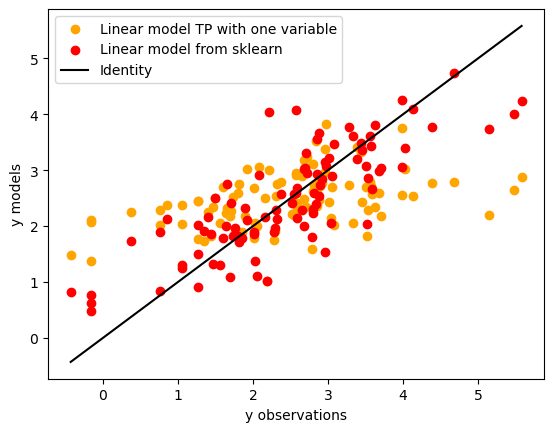

In [84]:
y_hat = np.matmul(X, beta)
y_hat

y_hat_model = model.predict(X)

plt.scatter(y, ypred, color= 'orange', label='Linear model TP with one variable')
plt.scatter(y, y_hat_model, color='red', label='Linear model from sklearn')
plt.plot(y, y, color='black', label='Identity')
plt.xlabel('y observations')
plt.ylabel('y models')
plt.legend()

On mesure la __qualité d'ajustement__ d'un modèle en comparant la variance de la variable d'intérêt $y$ à celle de sa prédiction $\hat y$. Comme $\hat y$ est une projection orthogonale de $y$ sur un sous-espace de $\mathbb R^n$ (qui contient le vecteur constant), la variance de $\hat y$ est toujours inférieure ou égale à celle de $y$. 

- $\frac 1 n \Vert y - \overline y \Vert^2 = \frac 1 n \sum_{i=1}^n (y_i - \overline y)^2$ est la __variance totale__


- $\frac 1 n \Vert \hat y - \overline y \Vert^2 = \frac 1 n \sum_{i=1}^n (\hat y_i - \overline y)^2$ est la __variance expliquée__


- $\frac 1 n \Vert y - \hat y \Vert^2 = \frac 1 n \Vert \hat \epsilon \Vert^2 = \frac 1 n \sum_{i=1}^n (y_i - \hat y_i)^2$ est la __variance résiduelle__


Le théorème de Pythagore nous donne: 

$$\begin{array}{ccccc} \underbrace{\frac 1 n \Vert y - \overline y \Vert^2} & = & \underbrace{\frac 1 n \Vert \hat y - \overline y \Vert^2} & + & \underbrace{\frac 1 n \Vert y - \hat y \Vert^2} \\ 
\text{variance totale} & & \text{variance expliquée} & &  \text{variance résiduelle} \end{array} $$

Le coefficient de détermination du modèle est donnée par

$$ R^2 = \frac{\Vert \hat y - \overline y \Vert^2}{\Vert y - \overline y \Vert^2} = 1 - \frac{\Vert \hat \epsilon \Vert^2}{\Vert y - \overline y \Vert^2} \in [0;1].  $$

Il mesure la part de la variance de $y$ expliquée par le modèle. Dans le cas univarié $p =1$, on a $R^2 = \rho_{xy}^2$. 
Dans le cas général, on peut montrer que $R^2 = \max \{ \rho_{yz}^2 : z \in \operatorname{Im}(X) \}$.

_Question 5. Comparer les qualités d'ajustement des modèles simple et multiple._

In [91]:
Rsquare_one_dim = (np.linalg.norm((ypred - y.mean()))/np.linalg.norm(y - y.mean()))**2
Rsquare_multiple_dim = (np.linalg.norm(y_hat - y.mean())/np.linalg.norm(y - y.mean())) **2

print("R_square_one_dim", Rsquare_one_dim)
print("R_square_multiple_dim", Rsquare_multiple_dim)

R_square_one_dim 0.18776568724378545
R_square_multiple_dim 0.6594011875812287


__Test de normalité__

Il existe des méthodes pour tester l'hypothèse de normalité: $H_0 : \epsilon_i \sim \mathcal N(0, \sigma^2) , \forall i=1,...,n$. En régression linéaire, le test le plus couramment utilisé et le test de Shapiro (fonction __shapiro__ de la librairie __scipy.stats__)

_Question 6. Représenter les histogrammes des résidus et implémenter les tests de Shapiro dans les deux modèles considérés._

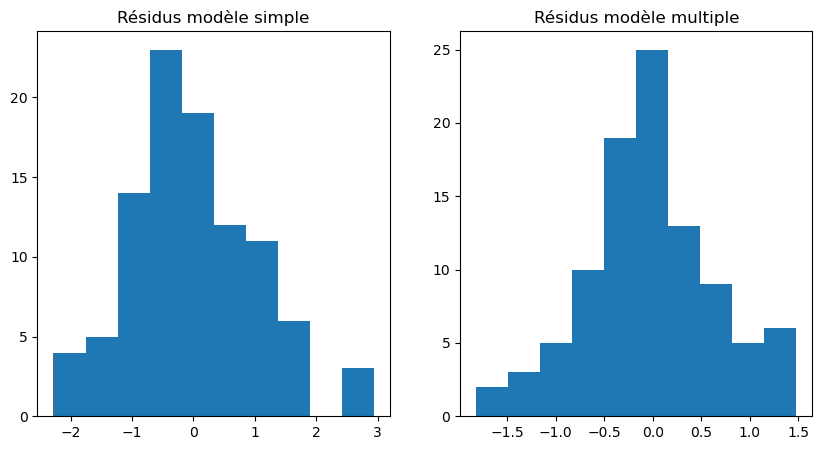

Modèle simple, test de normalité des résidus: pvalue = 0.203
Modèle multiple, test de normalité des résidus: pvalue = 0.409


In [95]:
import scipy.stats as ss

res = y - ypred
res2 = y - y_hat

fig = plt.figure(1, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(res)
plt.title("Résidus modèle simple")

plt.subplot(1, 2, 2)
plt.hist(res2)
plt.title("Résidus modèle multiple")

plt.show()

print("Modèle simple, test de normalité des résidus: pvalue =", round(ss.shapiro(res)[1], 3))
print("Modèle multiple, test de normalité des résidus: pvalue =", round(ss.shapiro(res2)[1],3))

__Significativité__

Pour tester la significativité globale du modèle, on considère l'hypothèse

$$ H_0: \beta_1 = ... = \beta_p = 0  $$

Cette condition traduit l'hypothèse qu'aucune des variables explicatives $X_1, ..., X_p$ n'est pertinente pour expliquer (linéairement) la variable réponse $y$.

_Proposition (test de significativité globale). Si $\epsilon$ est Gaussien, alors la statistique_
$$ F := \frac{ n - (p+1)}{p} \frac{\Vert \hat y - \overline y \Vert^2}{\Vert y - \hat y \Vert^2}   $$
_suit, sous $H_0$, une loi de Fisher à $p$ et $ n - (p+1)$ degrés de liberté._

On rejette $H_0$ si la valeur observée de $F$ est trop grande et jugée aberrante pour une loi de Fisher à $p$ et $ n - (p+1)$ degrés de liberté. Dans ce cas, le modèle est dit globalement significatif. 

Si l'hypothèse $H_0$ n'est pas vraie, alors on peut montrer que $F \overset{\mathbb P}{\longrightarrow} + \infty$. Le test est donc consistant.


La significativité globale n'implique pas la pertinence de toutes les variables. Pour tester la pertinence d'une variable $X_j$ dans le modèle, on pose l'hypothèse

$$ H_0: \beta_j = 0  $$

qui traduit que la variable $X_j$ n'est pas influente dans le modèle.


_Proposition (test de significativité d'un coefficient). Si $\epsilon$ est Gaussien, alors_ 
$$ T_j : = \frac{\hat \beta_j}{\hat \sigma ( (X^\top X)^{-1} )_{jj}} $$
_suit, sous $H_0$, une loi de Student à $n - (p + 1)$ degrés de liberté._


Le test se généralise à des hypothèses de la forme $H_0 : A \beta + b = 0$.

La condition de normalité de $\epsilon$ est nécessaire en théorie mais souvent négligée en pratique.

La différents tests de significativité sont implémentés directement par la fonction __OLS__ de la librairie __statsmodels.api__.

In [99]:
import statsmodels.api as sm
model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     24.61
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.43e-18
Time:                        14:56:36   Log-Likelihood:                -98.819
No. Observations:                  97   AIC:                             213.6
Df Residuals:                      89   BIC:                             234.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4576      1.163     -0.393      0.6

On retrouve des informations intéressantes (et d'autres moins) dans ce résumé, notamment le $R^2$ (_R-squared_)
et la statistique de test _F-statistic_ de significativitré globale et sa p-valeur _Prob (F-statistic)_.

Dans le tableau principal, la première colonne _coef_ donne les valeurs estimées des coefficients $\beta_j$ tandis que la colonne _std err_ correspond aux écart-types estimés des $\hat \beta_j$. 

La colonne _t_ donne la statistique de Student du test de significativité de chaque coefficient avec la p-valeur dans la colonne _P>|t|_. 

Les deux dernières colonnes du tableau donne un intervalle de confiance à $95 \%$ pour chaque coefficient. On peut remarquer qu'un coefficient n'est pas significatif à un niveau $\alpha = 0.05$ si l'intervalle de confiance contient $0$.

The standard error column corresponds to the estimated standard deviations of the OLS estimators $\hat \beta_j$, which we can verify manually

_Question 7 (facultative). Retrouver ''à la main'' les écart-types estimés des estimateurs $\hat \beta_j$ donnés dans la colonne std err._

In [100]:
hat_sigma2 = np.sum(res2 ** 2) / (len(y) - X.shape[1])
print(np.sqrt(hat_sigma2 * np.diagonal(np.linalg.inv(np.dot(X.transpose(), X)))))

[1.16309021 0.08704027 0.20094287 0.01099098 0.05790444 0.23930427
 0.08490283 0.12108117]


__Données atypiques__

Les observations atypiques (outliers) sont les données particulièrement éloignées de la valeur attendue estimée par le modèle. 

On a vu que $ \operatorname{var}(\hat \epsilon) = \sigma^2 (I - \Pi_X) $, en particulier

$$ \operatorname{var}( \hat \epsilon_i) = \sigma^2 (1-\Pi_{X,ii}).  $$ 

Les résidus ne sont donc pas homoscédastiques, il faut en tenir compte pour détecter les outliers (c'est l'__effet levier__). Pour cela, on définit le _résidu standardisé_

$$ r_i = \frac{\hat \epsilon_i}{\hat \sigma \sqrt{1 - \Pi_{X,ii}}}.  $$

Un point est considéré comme atypique si le résidu standardisé est trop éloigné de $0$ (en pratique si $| r_i | > 2$). 


La __distance de Cook__ de $y_i$ mesure l'écart entre la prédiction $\hat y$ et celle obtenue en enlevant la $i$-ème observation $(y_i,x_{1i},...,x_{pi})$. Elle permet d'évaluer l'influence de la $i$-ème observation sur la régression. 

Elle est donnée par

$$ D_i = \frac{1}{p+1}\frac{\Pi_{X,ii}}{1-\Pi_{X,ii}} r_i^2.  $$

La distance de Cook combine les informations de l'effet levier (via le terme $\Pi_{X,ii}$) et de l'écart au modèle (via le résidu standardisé $r_i$) pour déterminer les données influentes. 

En pratique, un point est souvent jugé influent si sa distance de Cook est supérieure à $1$.

Les données influentes sont accessibles par la fonction __get_influence__ , puis __summary_frame__ du modèle ajusté. 

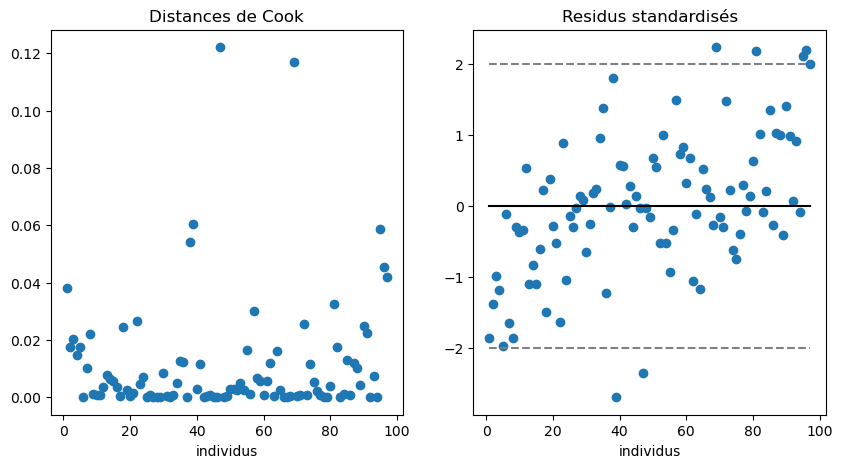

In [102]:
infl = fit.get_influence()

fig = plt.figure(1, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Distances de Cook")
plt.scatter(np.arange(1, len(y)+1), infl.summary_frame()["cooks_d"])
plt.xlabel("individus")

plt.subplot(1, 2, 2)
plt.title("Residus standardisés")
plt.plot(np.arange(1, len(y)+1), np.zeros(len(y)), color = "black")
plt.plot(np.arange(1, len(y)+1), 2*np.ones(len(y)), "--", color = "grey")
plt.plot(np.arange(1, len(y)+1), -2*np.ones(len(y)), "--", color = "grey")
plt.scatter(np.arange(1, len(y)+1), infl.summary_frame()["standard_resid"])
plt.xlabel("individus")

plt.show()

### Sélection de variables

Une étape importante de la régression linéaire est de déterminer et éliminer les variables non-pertinentes. 

Le modèle global contient $p+1$ variables explicatives, il y a $2^{p+1}$ sous-modèles possibles, un pour chaque $m \subseteq \{ \mathbf 1, x_1,...,x_p \}$. 

On notera  $\vert m \vert$ le cardinal de $m$ et $\hat y^{(m)}$ le vecteur des variables prédites par le modèle $m$.


__Sélection par tests d'hypothèse__

On peut tester la significativité de chaque coefficient $\beta_j$ dans le modèle et supprimer (resp. ajouter) une à une les variables non-significatives (resp. significatives). 

- Méthode descendante (backward elimination): On part du modèle complet et on supprime à chaque étape la variable la moins significative. La procédure s'arrête lorsque toutes les variables sont significatives pour un seuil fixé (p-value $< \alpha$).

- Méthode ascendante (forward selection): On part du modèle vide et on intègre à chaque étape la variable la plus significative, jusqu'à ce qu'aucune nouvelle variable ne le soit. 

- Méthode pas-à-pas (stepwise selection): On part d'un modèle arbitraire et on évalue à chaque fois la significativité de chaque variable supprimée ou rajoutée au modèle. On s'arrête dès que le modèle ne peut être modifié sans améliorer la significativité. 

Attention, les variables doivent être supprimées ou ajoutées __une par une__, et la significativité de chaque variable re-testée à chaque étape.

_Question 8. Implémenter la méthode descendante de sélection de variables en supprimant une-à-une les variables non significatives au niveau $\alpha = 0.05$._

In [103]:
alpha = 0.05
X1 = X
fit1 = fit
while np.max(fit1.pvalues[1:]) > alpha:
    k = 1 + np.argmax(fit1.pvalues[1:])
    X1 = X1.drop(columns = X1.columns[k], axis = 1)
    model1 = sm.OLS(y, X1)
    fit1 = model1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     54.15
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.44e-20
Time:                        15:11:47   Log-Likelihood:                -102.05
No. Observations:                  97   AIC:                             212.1
Df Residuals:                      93   BIC:                             222.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7772      0.623     -1.247      0.2

__Indicateurs de la qualité d'un modèle__ 

On rappelle que le coefficient de détermination d'un modèle $m$, qui évalue la part de la variance de $y$ expliquée par le modèle, est donné par

$$R^2(m) = \frac{\Vert \hat y^{(m)} - \overline y  \Vert^2}{\Vert y - \overline y  \Vert^2}, $$ 
    
Le modèle avec le plus grand $R^2$ est toujours le modèle complet. Le $R^2$ seul ne permet donc pas de détecter les variables non-influentes, il n'est pas adapté à la sélection de variable. 

Il existe des critères ajustés qui permettent de quantifier la qualité d'un modèle en tenant compte de l'ajustement et de sa simplicité. Par exemple:

- Le $R^2$ ajusté 

$$ R^2_a(m)	= \frac{(n-1) R^2(m) - \vert m \vert + 1}{n-\vert m \vert}. $$

est une modification du $R^2$ (justifiée théoriquement) qui privilégie les modèles contenant peu de variables. On utilise aussi souvent des critères dits pénalisés, qu'il faut minimiser, notamment:

- L'Akaike Information Criterion

$$ \operatorname{AIC}(m) =  \Vert y  - \hat y^{(m)} \Vert^2 + 2 \vert m \vert \hat \sigma^2.  $$

- Le Bayesian Information Criterion

$$ \operatorname{BIC}(m) = \Vert y  - \hat y^{(m)} \Vert^2 + \ln(n) \vert m \vert  \hat \sigma^2  $$

Le BIC privilégie les modèles parcimonieux (peu de variables) par rapport à l'AIC du fait de sa pénalité plus forte sur la dimension (avec un facteur $\ln(n)$ pour le BIC contre un facteur $2$ pour l'AIC). 



__Validation croisée__

Le principe de la validation croisée est d'estimer les paramètres à partir d'un sous-échantillon des données et d'évaluer leurs performances de prédiction sur les données mises de côté. 

La version la plus simple est le critère PRESS (prediction error sum of square), pour lequel une seule observation est laissée de côté. Soit $\hat y^{(i)}_{m,i}$ la prédiction de $y_i$ estimée dans le modèle $m$ à partir des données sans $y_i$, 

$$ \operatorname{PRESS}(m) = \sum_{i=1}^n ( \hat y^{(i)}_{m,i} - y_i)^2. $$

On retient le modèle avec le PRESS le plus faible. Ce critère se calcule relativement simplement en pratique par

$$ \operatorname{PRESS}(m) = \sum_{i=1}^n \frac{\hat \epsilon_{m,i}^2}{(1 - \Pi_{m,ii})^2}. $$

_Question 9. Implémenter un algorithme pas-à-pas de sélection de variables basé sur le critère AIC._

### Méthodes robustes d'estimation

__Régression sur composantes principales__

Dans cette partie, on travaille sur les variables _centrées réduites_ 

$$ z = \frac{y - \overline{y}}{\sigma_y} \ \text{ et } \ w_j = \frac{x_j - \overline x_j}{\sigma_{x_j}} \ , \ j = 1,...,p. $$ 

On considère la matrice normalisée

$$ W = \left( \begin{array}{ccc} w_{11} & \dots & w_{p1}  \\ \vdots & \ddots & \vdots \\  w_{1n} & \dots & w_{pn}   \end{array} \right)   $$

et le modèle de régression linéaire sans constante

$$ z = W \gamma + \eta.  $$

Cette normalisation permet d'avoir des variables de même ordres de grandeurs (car réduites) et de s'affranchir de la constante (car variables centrées). 

On peut toujours se ramener aux variables initiales en faisant les transformations inverses, le modèle normalisé est équivalent en terme d'ajustement.

L'analyse en composante principale a pour but de construire une base orthogonale de $\operatorname{Im}(W)$ ordonnée par la quantité d'information (ou variance). L'idée intuitive est que des variables explicatives plus dispersées permettront mieux en général de calibrer la régression. 

Les _composantes principales_ $c_1,...,c_p$ sont les $p$ premiers vecteurs propres de $W W^\top $ ordonnés par ordre décroissant des valeurs propres.
 
Si $X$ est de plein rang ($X^\top X$ inversible), alors

- les vecteurs $\mathbf 1, c_1,...,c_p$ forment une base orthogonale de $\operatorname{Im}(X)$. 

- Pour tout $k=1,...,p$, la variance de $(c_1,...,c_k)$ est maximale parmi les sous-espaces de dimension $k$. 

- L'estimateur des MCO $(\hat \gamma_1,...,\hat \gamma_k)$ associé est de variance minimale.

Les boîtes à moustaches des composantes principales de $X$, obtenues en utilisant la fonction __PCA__ de la librairie __sklearn.decomposition__, montrent que la décroissance de la variance.

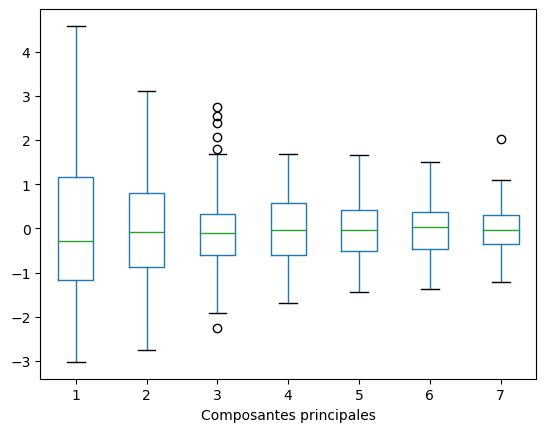

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

W = pd.DataFrame(scaler.fit_transform(X), index = X.index, columns = X.columns)
W = W.drop(columns = "const", axis = 1)

pca = PCA(n_components = 7, svd_solver = 'full')
pca.fit(W)

C = pd.DataFrame(np.dot(W, pca.components_.transpose()))
C.boxplot(grid = False)
plt.xlabel("Composantes principales")
plt.xticks(np.arange(7) + 1, np.arange(7) + 1)
plt.title("")
plt.show()

_Question 10. Représenter les $R^2$ des modèles de régression sur les $k$ premières composantes principales pour $k$ allant de $1$ à $7$._

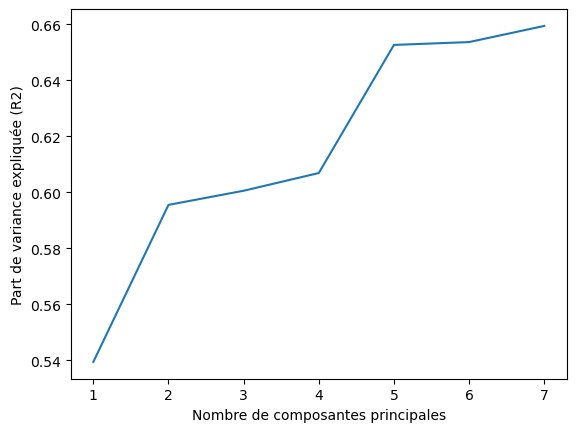

In [116]:
z = (y - np.mean(y))/np.std(y)

R2 = np.zeros(7)
for k in np.arange(1, 8):
    model = sm.OLS(z, W[W.columns[0:k]])
    fit = model.fit()
    R2[k-1] = fit.rsquared
    
plt.plot(np.arange(1, 8), R2)
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Part de variance expliquée (R2)")
plt.show()

__Régression ridge__

Des corrélations entre les variables explicatives entraînent

- des valeurs propres de $X^\top X$ (ou $W^\top W$) proches de zéro

- une variance de $\hat \beta$ (ou $\hat \gamma$) qui explose du fait que $ \operatorname{var}(\hat \beta) =  \sigma^2 (X^\top X)^{-1}$

L'idée de la régression Ridge est de pénaliser les grandes valeurs (en norme) de $\hat \beta$. L'estimateur Ridge minimise le critère pénalisé

$$ \hat \gamma_\kappa^{ridge} = \arg \min_{c \in \mathbb R^{p}} \big\{ \Vert z - W c \Vert^2 + \kappa \Vert c \Vert^2  \big\}$$

où $\kappa > 0 $ est un paramètre à calibrer. Sa forme explicite est 

$$ \hat \beta_\kappa^{ridge}  = (W^\top W + \kappa I)^{-1} W^\top z.  $$

Le calibrage du paramètre $\kappa$ permet de trouver un compromis entre biais et variance puisque

- si $\kappa \to 0$:

 $$ \text{biais} \to - \gamma \ \ , \ \ \text{var} \to 0  $$

- si $\kappa \to +\infty$:

 $$ \text{biais} \to 0 \ \ , \ \ \text{var} \to \sigma^2 (W^\top W)^{-1} $$

_Question 11. Implémenter la méthode Ridge dans le modèle de régression multiple sur les données (normalisées ou non) pour des valeurs de $\kappa$ allant de $0$ à $10$. Représenter graphiquement l'évolution des coefficients estimés, puis de l'erreur quadratique moyenne._

In [125]:
from sklearn.linear_model import Ridge

Kappa = np.linspace(0, 10, 100)
ridge = Ridge()
coefs = []
errors = []
for kappa in Kappa:
    ridge.set_params(alpha = kappa)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X) - y) ** 2))

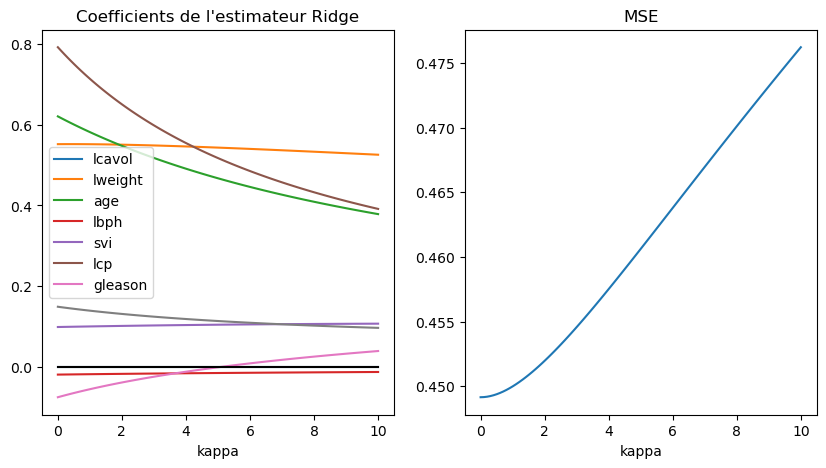

In [126]:
fig = plt.figure(1, figsize=(10, 5))

plt.subplot(1, 2, 1)
ax = plt.gca()
ax.plot(Kappa, coefs)
plt.xlabel('kappa')
plt.ylabel("")
plt.plot(Kappa, np.zeros(100), color = "black")
plt.title("Coefficients de l'estimateur Ridge")
ax.legend(labels = W.columns)

plt.subplot(1, 2, 2)
ax = plt.gca()
ax.plot(Kappa, errors)
plt.xlabel('kappa')
plt.title('MSE')
plt.show()

plt.show()

_Question 12. Calibrer le paramètre $\kappa$ par validation croisée, en utilisant la fonction __cross_val_score__ de la librairie __sklearn.model_selection__ avec l'argument __scoring = "neg_mean_squared_error"__ pour renvoyer l'opposé de l'erreur quadratique, qu'il faut donc maximiser._

In [127]:
from sklearn.model_selection import cross_val_score
PRESS = np.zeros(len(Kappa))
for i in range(len(Kappa)):
    ridge = Ridge(alpha = Kappa[i])
    press = - cross_val_score(ridge, X, y, scoring = "neg_mean_squared_error", cv = len(y))
    PRESS[i] = np.mean(press)

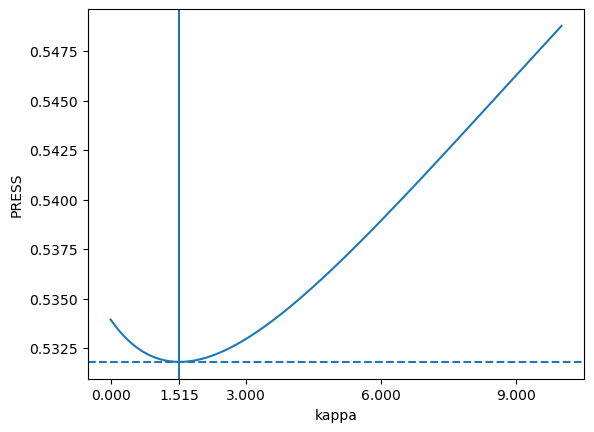

In [128]:
ax = plt.gca()
ax.plot(Kappa, PRESS)
plt.xlabel('kappa')
plt.ylabel('PRESS')
kappa_min = Kappa[np.argmin(PRESS)]
plt.axvline(x = kappa_min)
plt.axhline(y = np.min(PRESS), linestyle = 'dashed')
plt.xticks([0, kappa_min, 3, 6, 9])
plt.show()

__Régression lasso__

La régression lasso (least absolute shrinkage and selection operator) est construit en minimisant un critère pénalisé avec la norme $\ell^1$: 

$$ \hat \gamma_\kappa^{lasso} = \arg \min_{c \in \mathbb R^{p}} \Vert z - W c \Vert^2 + \kappa \sum_{j=1}^p \vert c_j \vert \ \big( \! \longleftarrow \text{ norme } \ell^1 \big) $$

avec, comme pour le Ridge, $\kappa >0$ un paramètre à calibrer. L'avantage du lasso par rapport au Ridge est qu'il produit un estimateur sparse (ayant certains coefficients nuls), ce qui s'apparente à de la sélection de variables.

Il n'a pas de forme explicite, mais le problème d'optimisation convexe pour le déterminer est en général peu coûteux en temps de calcul.

_Question 13. Implémenter la méthode lasso dans le modèle de régression multiple sur les données normalisées allant de $0.01$ à $0.8$. Représenter graphiquement l'évolution des coefficients estimés, puis de l'erreur quadratique moyenne._

In [129]:
from sklearn.linear_model import Lasso
Kappa = np.linspace(0.01, 0.8, 100)
lasso = Lasso()
coefs = []
errors = []
for kappa in Kappa:
    lasso.set_params(alpha = kappa)
    lasso.fit(W, z)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(W) - z) ** 2))

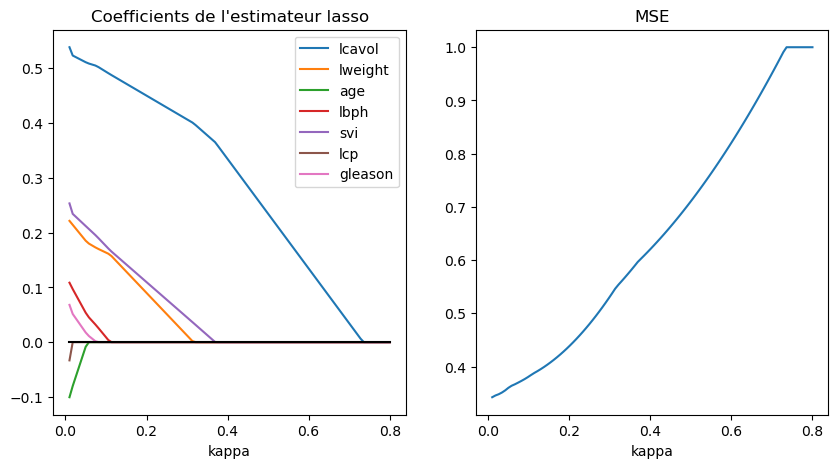

In [130]:
fig = plt.figure(1, figsize=(10, 5))

plt.subplot(1, 2, 1)
ax = plt.gca()
ax.plot(Kappa, coefs)
plt.xlabel('kappa')
plt.ylabel("")
plt.plot(Kappa, np.zeros(100), color = "black")
plt.title("Coefficients de l'estimateur lasso")
ax.legend(labels = W.columns)

plt.subplot(1, 2, 2)
ax = plt.gca()
ax.plot(Kappa, errors)
plt.xlabel('kappa')
plt.title('MSE')
plt.show()

plt.show()

_Question 14. Calculer les valeurs des coefficients estimés pour $\kappa = 0.2$ pour vérifier la propriété de sparsité._

In [131]:
Lassoreg = Lasso(alpha = 0.2)
Lassoreg.fit(W, z)
Coefs = list(W)
Vals = Lassoreg.coef_
for i in range(len(Coefs)):
    print(Coefs[i], "=", str(Vals[i]))

lcavol = 0.4501153749637313
lweight = 0.09001145875611961
age = 0.0
lbph = 0.0
svi = 0.10968938043003926
lcp = 0.0
gleason = 0.0


_Question 15. Calibrer le $\kappa$ optimal par validation croisée. On pourra se restreidre à l'intervalle $[0.015, 0.03]$._

In [132]:
from sklearn.model_selection import cross_val_score
Kappa = np.linspace(0.015, 0.030, 100)
PRESS = np.zeros(len(Kappa))
for i in range(len(Kappa)):
    lasso.set_params(alpha = Kappa[i])
    las = lasso.fit(W, z)
    press = - cross_val_score(las, W, z, scoring = "neg_mean_squared_error", cv = len(z))
    PRESS[i] = np.mean(press)

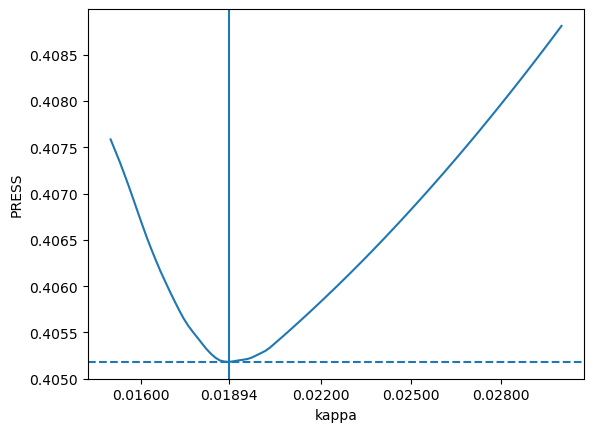

In [133]:
ax = plt.gca()
ax.plot(Kappa, PRESS)
plt.xlabel('kappa')
plt.ylabel('PRESS')
kappa_min = Kappa[np.argmin(PRESS)]
plt.axvline(x = kappa_min)
plt.axhline(y = np.min(PRESS), linestyle = 'dashed')
plt.xticks([0.016, kappa_min, 0.022, 0.025, 0.028])
plt.show()